In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
import warnings


warnings.filterwarnings("ignore")

In [7]:
train_path = "train_data.txt"
train_path = "test_data.txt"
train_path = "test_data_solution.txt"

In [8]:
train_data = pd.read_csv("train_data.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')
test_data = pd.read_csv("test_data.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')
test_data_solution = pd.read_csv("test_data_solution.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')

In [5]:
train_data

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
20748,20749,Blocking the Path to 9/11 (2008),documentary,There's more to the story of the Clintons and...
20749,20750,"""The Collectors"" (1986)",drama,"Harry Caines is the new Customs Surveyor, or ..."
20750,20751,Venus in Fur (2017),drama,Actress Vanda (Meera) and director Novacheck(...
20751,20752,Behind the Movement (2018),drama,Behind the Movement is a unique and fast-pace...


In [9]:
test_data

,ID,Title,Genres,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
...,...,...,...,...
32704,32705,Pool Critters (2009),"In a dilapidated bar at the edge of the city,...",NaN
32705,32706,4 Clowns (1970),"The ""four clowns"" of this Robert Youngson ant...",NaN
32706,32707,Hyeongju chima (1964),In order to have help in raising his three ch...,NaN
32707,32708,Doctor Mike (1959),Pilot for a proposed medical series set in a ...,NaN


In [10]:
test_data_solution

,ID,Title,Genres,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
22494,22495,Szerencsés flótás (1943),comedy,Mail author for translation. A kastely lakoin...
22495,22496,Treasures (Trezoros),documentary,A moving documentary that illuminates the liv...
22496,22497,Frank Yankovic: America's Polka King (2010),documentary,This film hosted by Myron Floren is a compreh...
22497,22498,The Knackery (2009),horror,"Set in the very near future, The Knackery is ..."


In [11]:
print("shape",train_data.shape)

shape (20753, 4)


In [12]:
print("shape",test_data.shape)

shape (32709, 4)


In [13]:
print("shape",test_data_solution.shape)

shape (22499, 4)


In [14]:
train_data.head()

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [15]:
test_data.head()

,ID,Title,Genres,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [16]:
test_data_solution.head()

,ID,Title,Genres,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [17]:

data = pd.concat((train_data ,test_data_solution))
data.columns = ["id" ,"Title","Genre","Description"]
data.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [18]:
data.duplicated().sum()



0

In [19]:
data.isna().sum()

id             0
Title          0
Genre          0
Description    0
dtype: int64

In [21]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'[#@\$]', '', text)

    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopword]
    return " ".join(text)

In [24]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
data["Despcription_clean"] =  data["Description"].apply(preprocessing)
data.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [27]:
data["Genre"].value_counts()

 drama           10851
 documentary     10464
 comedy           5898
 short            4113
 horror           1736
 thriller         1266
 action           1066
 western           805
 reality-tv        712
 family            625
 adventure         616
 music             593
 romance           523
 sci-fi            520
 adult             481
 animation         429
 crime             377
 sport             342
 talk-show         306
 fantasy           272
 mystery           251
 musical           202
 biography         192
 history           188
 game-show         155
 news              153
 war               116
Name: Genre, dtype: int64

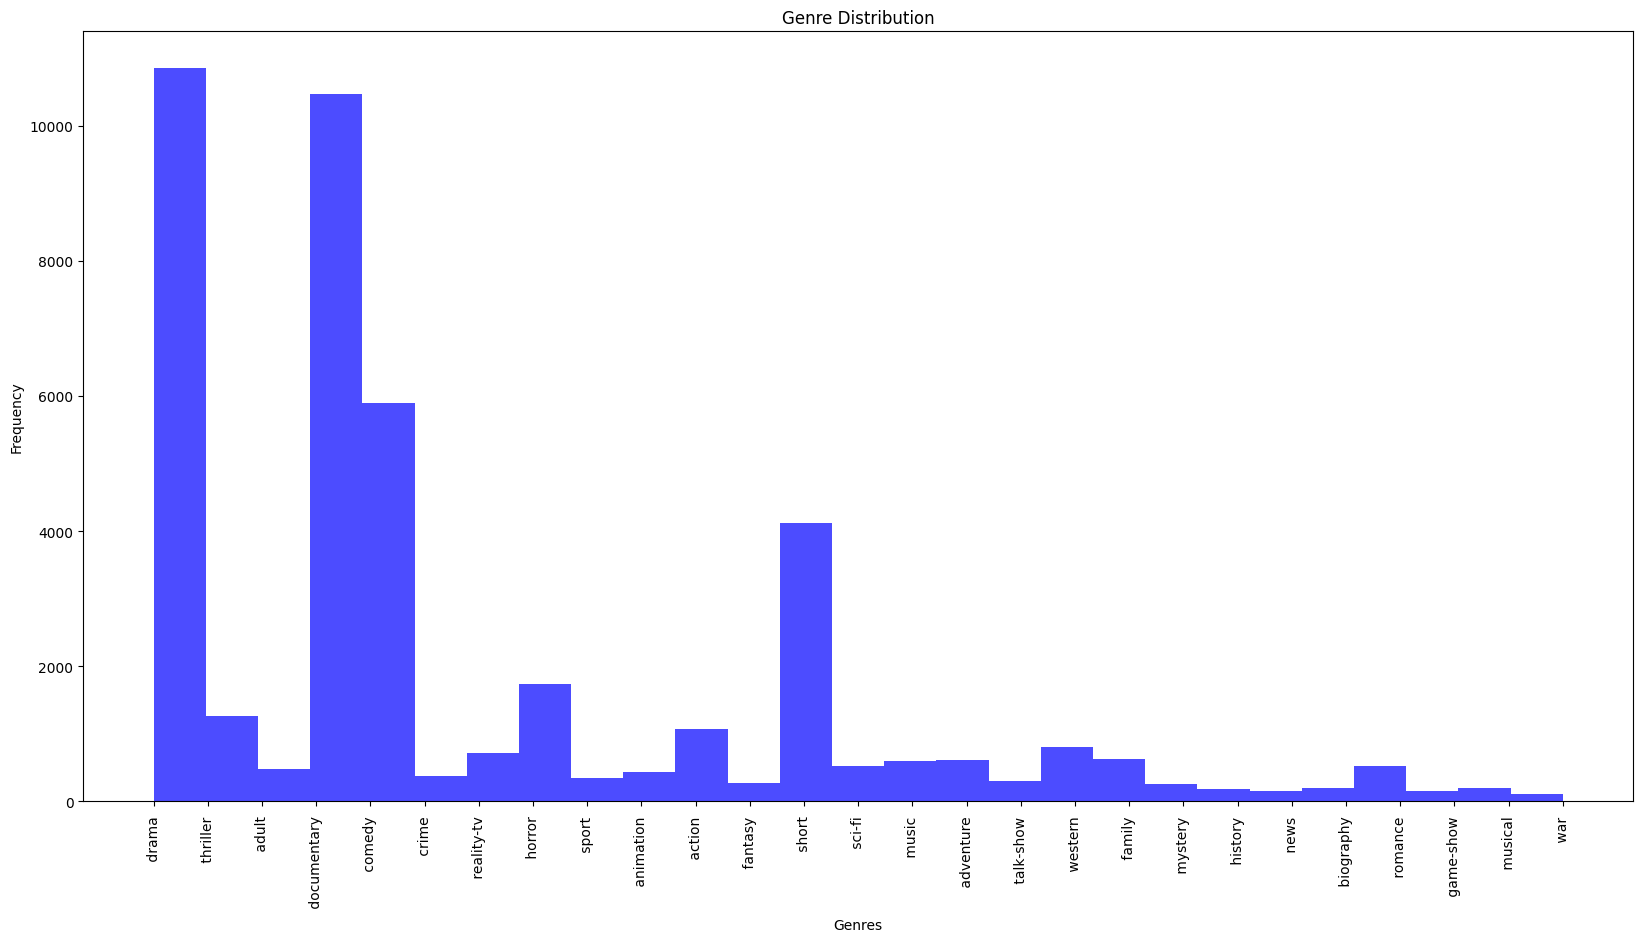

In [29]:
plt.figure(figsize=(20, 10))
plt.hist(data["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

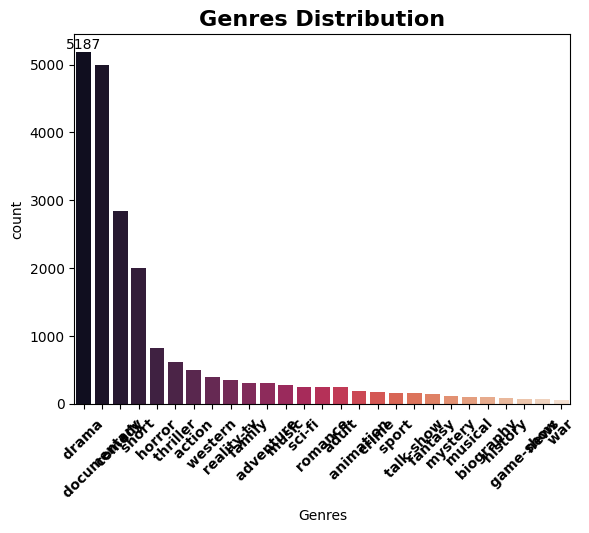

In [30]:
ax=sns.countplot(data=train_data,x='Genres',order=train_data.Genres.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

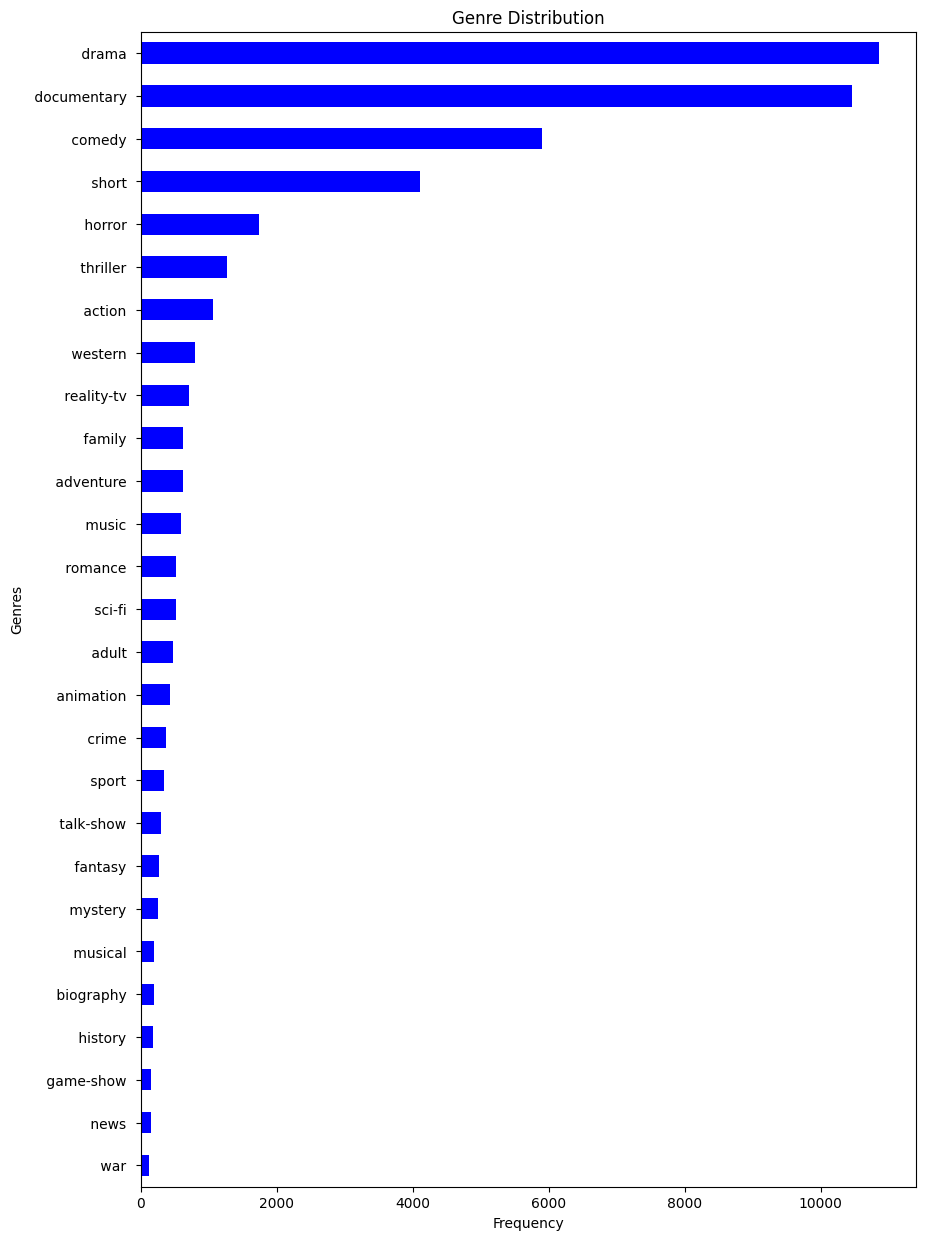

In [31]:
genre_counts = data["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

In [32]:
data1 = data.drop(["Title","id"] , axis = 1)
data1.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data1['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [word.lower() for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    clean_text = ' '.join(tokens)
    return clean_text
data1['Description_clean'] = data1['Description'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
from sklearn.model_selection import train_test_split

x = data1["Description_clean"]
y = data1["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)


In [39]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

In [43]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train1, y_train)


MultinomialNB()

In [45]:
from sklearn.metrics import classification_report

y_pred = mnb.predict(x_test1)

print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

      action        0.80      0.04      0.07       556
       adult        0.67      0.01      0.02       241
   adventure        0.64      0.05      0.09       336
   animation        0.00      0.00      0.00       218
   biography        0.00      0.00      0.00        99
      comedy        0.51      0.39      0.44      3028
       crime        0.00      0.00      0.00       188
 documentary        0.55      0.89      0.68      5190
       drama        0.43      0.82      0.57      5352
      family        0.00      0.00      0.00       339
     fantasy        0.00      0.00      0.00       145
   game-show        1.00      0.18      0.30        79
     history        0.00      0.00      0.00        93
      horror        0.72      0.20      0.31       854
       music        0.94      0.05      0.10       287
     musical        0.00      0.00      0.00        91
     mystery        0.00      0.00      0.00       125
        n

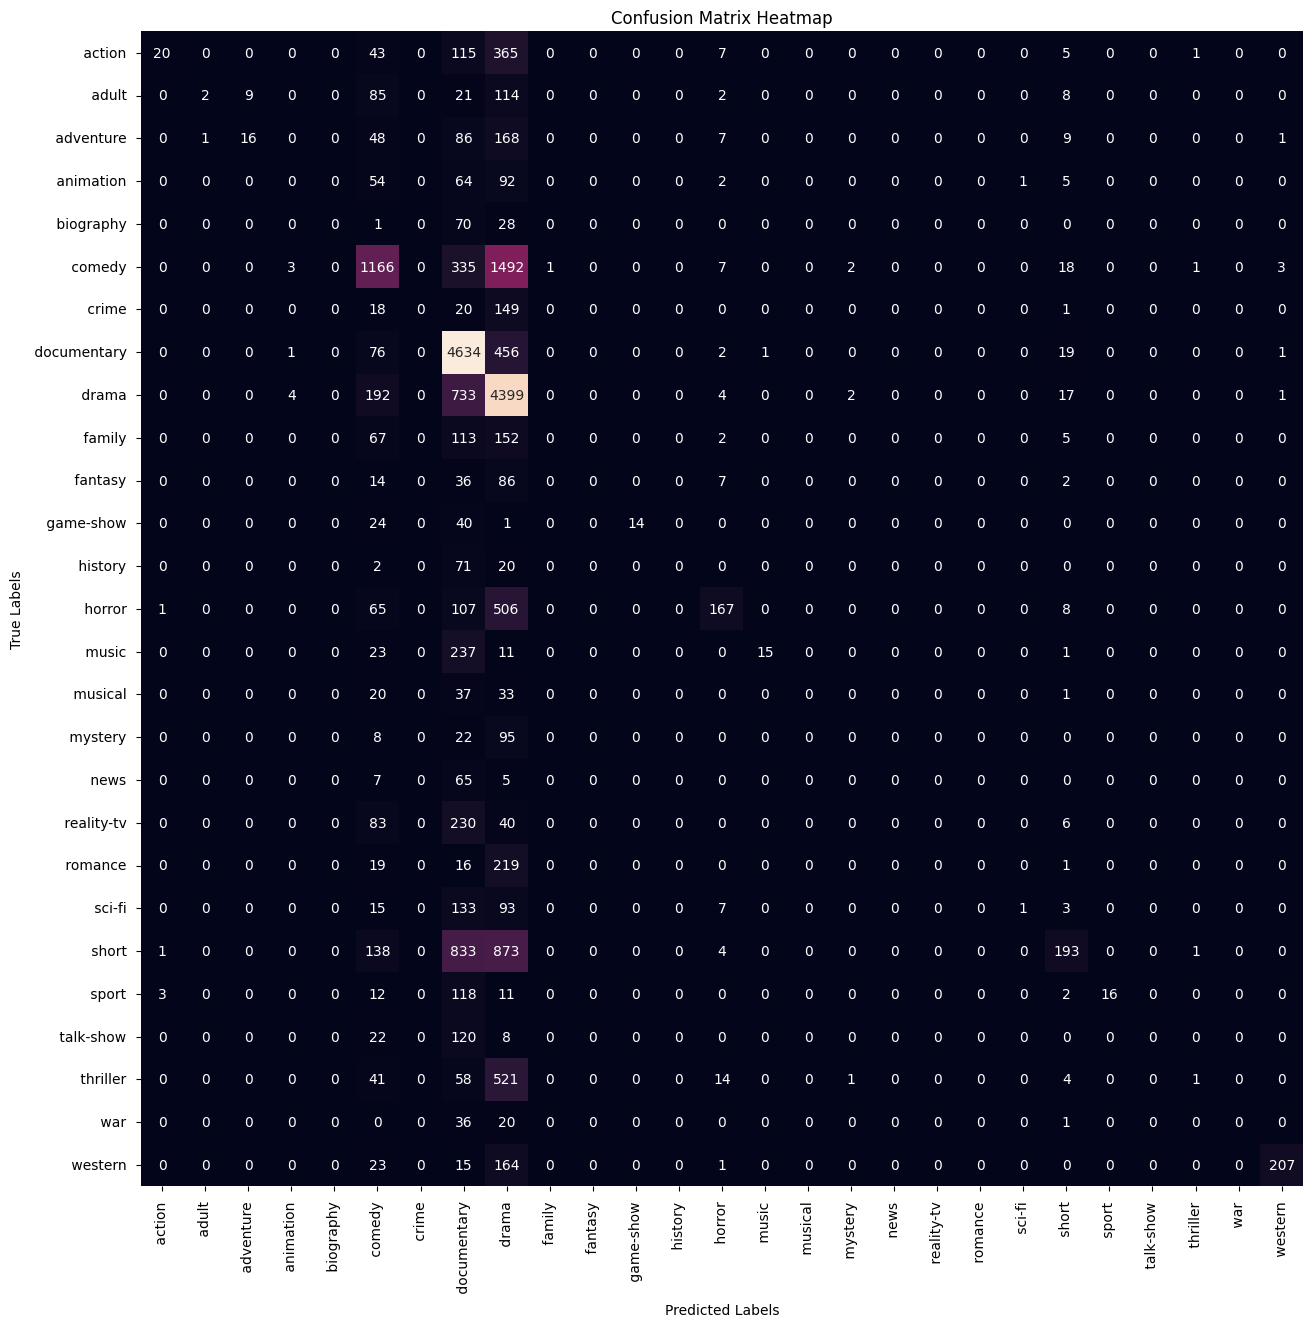

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


Model Score on Training data 0.9994913530010173
Model Score on Testing data 0.5411079256450568
               precision    recall  f1-score   support

      action        0.26      0.39      0.31       365
       adult        0.24      0.62      0.34        92
   adventure        0.21      0.48      0.29       145
   animation        0.12      0.38      0.18        69
   biography        0.01      0.14      0.02         7
      comedy        0.53      0.49      0.51      3277
       crime        0.04      0.15      0.06        48
 documentary        0.78      0.68      0.73      6012
       drama        0.68      0.52      0.59      6952
      family        0.12      0.40      0.19       102
     fantasy        0.04      0.43      0.08        14
   game-show        0.52      0.84      0.64        49
     history        0.00      0.00      0.00         4
      horror        0.54      0.59      0.56       781
       music        0.47      0.62      0.53       215
     musical        0.04

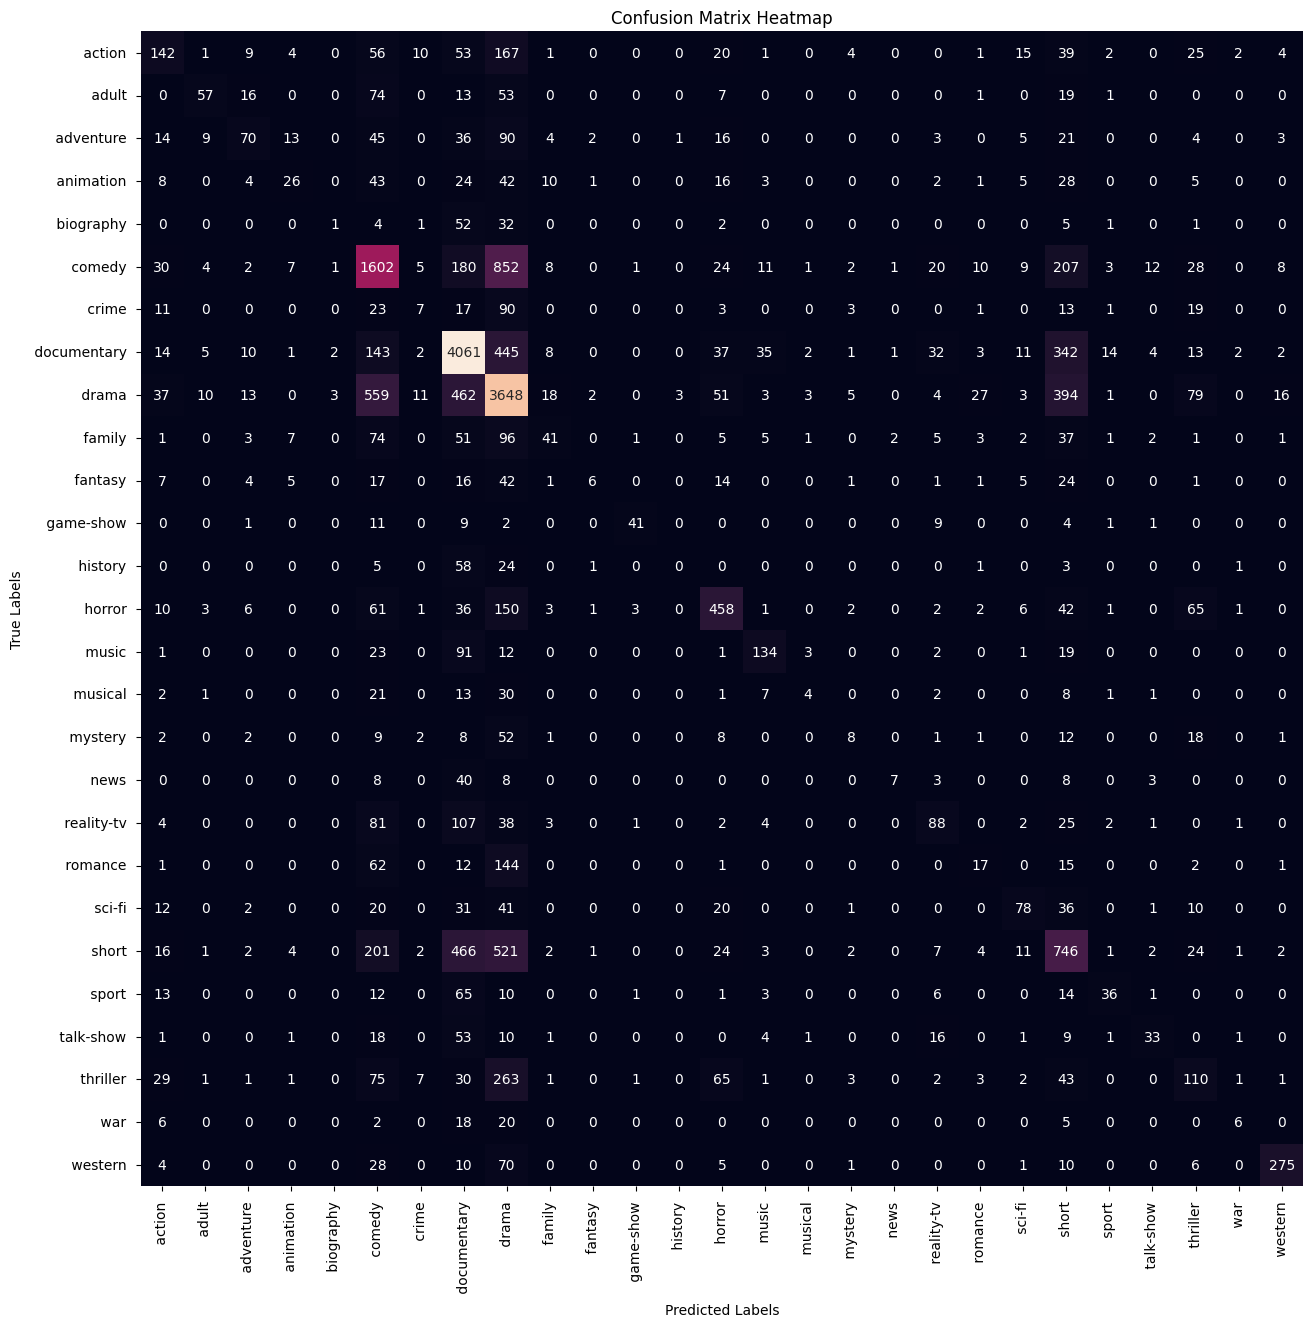

In [55]:
#for logistic regression

model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Testing data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [52]:
# tf-ide
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.6711828354758161
Model Score on Testing data 0.5017571441783039
               precision    recall  f1-score   support

      action        0.04      0.80      0.07        25
       adult        0.01      0.67      0.02         3
   adventure        0.05      0.64      0.09        25
   animation        0.00      0.00      0.00         8
   biography        0.00      0.00      0.00         0
      comedy        0.39      0.51      0.44      2266
       crime        0.00      0.00      0.00         0
 documentary        0.89      0.55      0.68      8365
       drama        0.82      0.43      0.57     10121
      family        0.00      0.00      0.00         1
     fantasy        0.00      0.00      0.00         0
   game-show        0.18      1.00      0.30        14
     history        0.00      0.00      0.00         0
      horror        0.20      0.72      0.31       233
       music        0.05      0.94      0.10        16
     musical        0.00

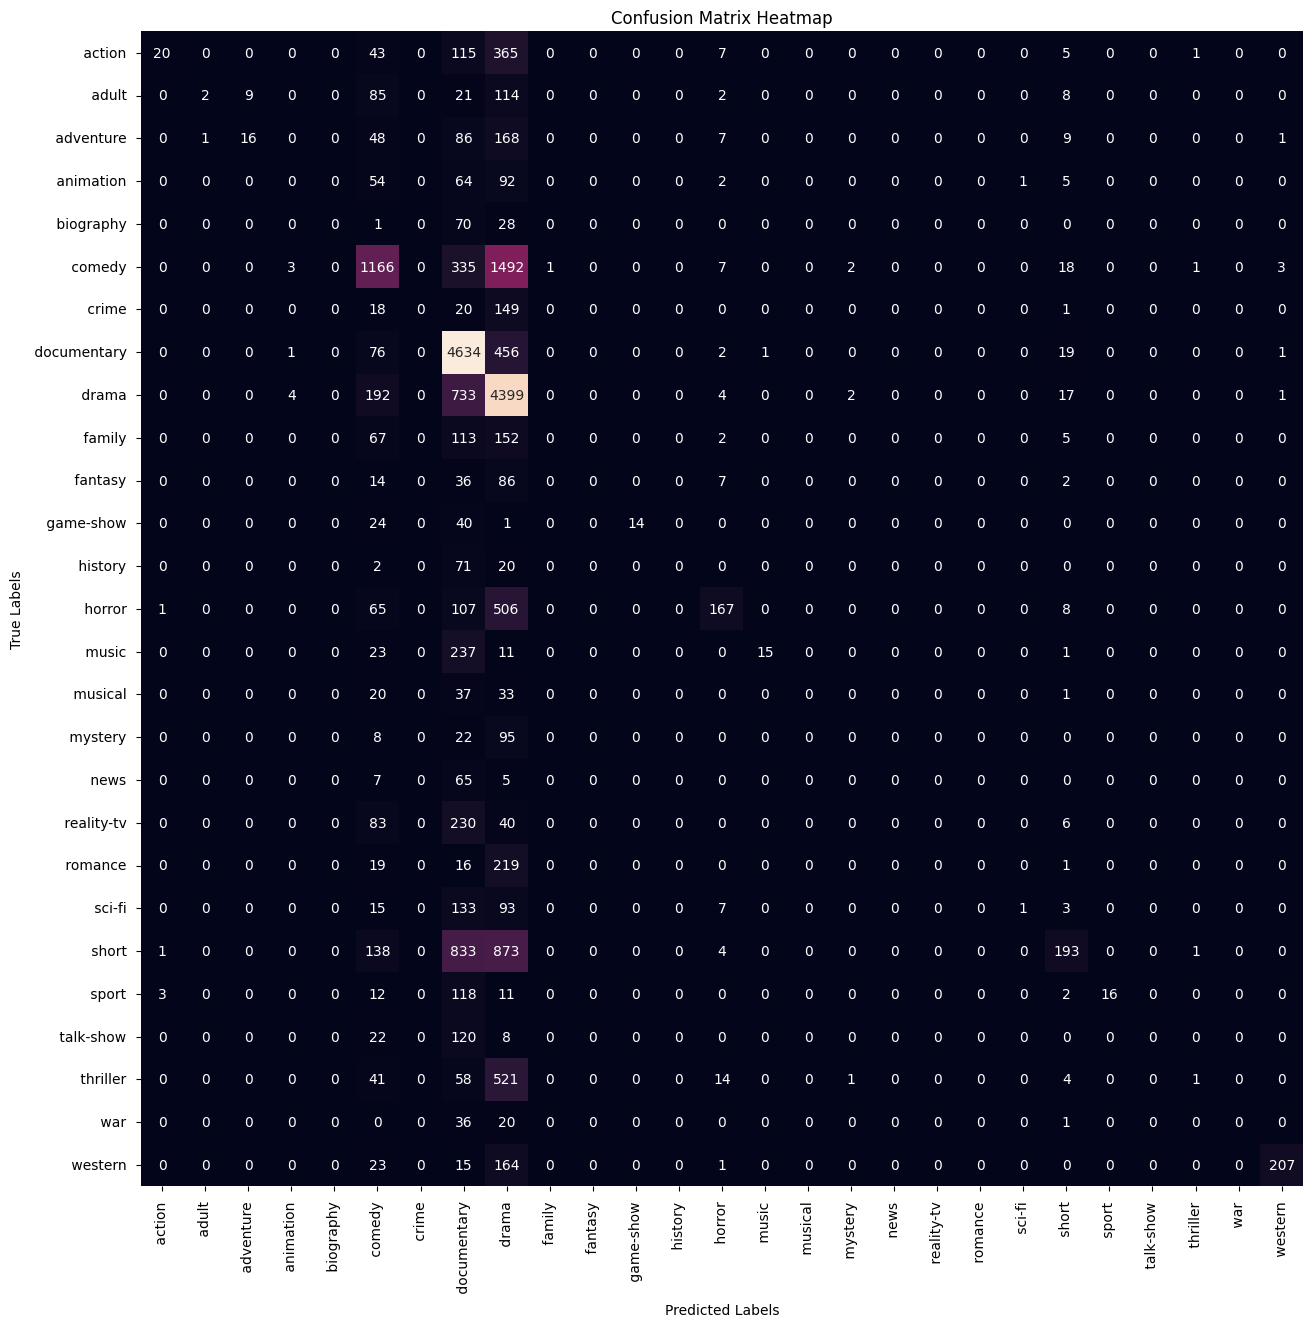

In [54]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Testing data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()